<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_YB_Week5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 분류

## 1. 분류의 개요

지도학습은 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식. 지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측.

분류는 다양한 알고리즘으로 구현할 수 있음
- 베이즈(Bayes)통계와 생성 모델에 기반한 나이브 베이즈
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 Support Vector Machine
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른 머신러닝 알고리즘을 결합한 Ensemble


앙상블
- 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능을 보임
- **배깅(Bagging)** 방식 -> Random Forest: 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 분석가가 애용하는 알고리즘
- **부스팅(Boosting)** 방식 -> Gradient Boosting: 뛰어난 예측 성능이 있지만 오래 걸림 / XGBoost, LightGBM: 정형 데이터의 분류 영역에서 가장 활용도가 높음
- 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리

결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합이 발생해 예측 성능이 저하될 수도 있음.

하지만 단점이 앙상블 기법에서는 장점으로 작용함. 앙상블은 매우 많은 여러 개의 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 됨.


## 2. 결정 트리

직관적으로 이해하기 쉬운 알고리즘. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것. 어떤 기준으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함.

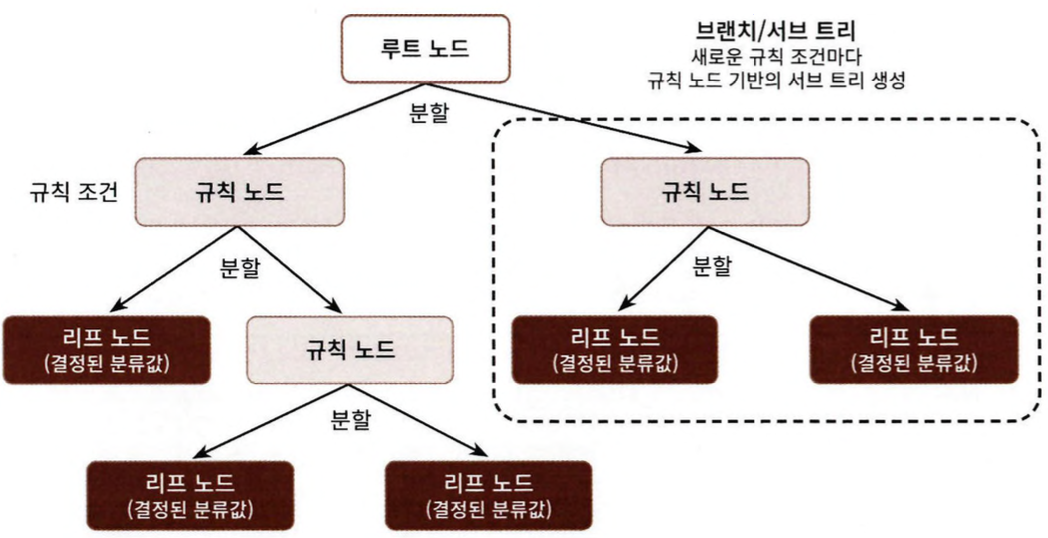

- 규칙 노드: 규칙 조건이 되는 것
- 리프 노드: 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리가 생성됨

많은 규칙이 있다는 것은 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 과적합으로 이어질 수 있음. 즉, 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음. 적은 결정 노드로 높은 에측 정확도를 가지려면 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정적 노드의 규칙이 정해져야 함.


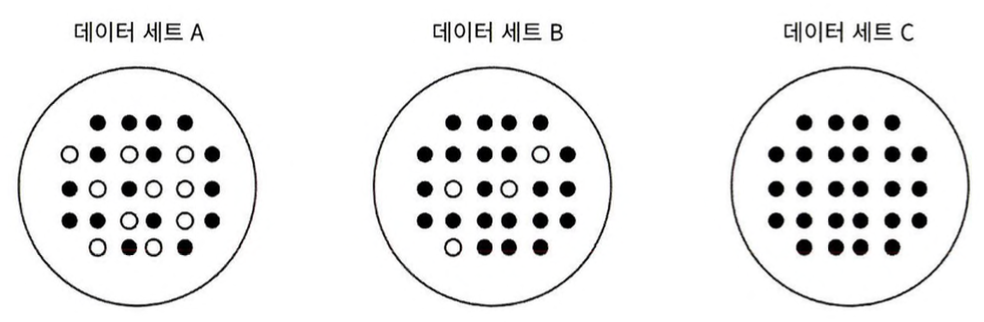

균일도: C > B > A
- C: 모두 검은 공으로 구성되므로 데이터 모두 균일
- B: 일부 하얀 공을 갖고 있지만, 대부분 검은 공
- A: 검은 공과 흰 공이 비슷

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 서브 데이터 세트에서 균일도가 높은 자식 데이터 시트 쪼개는 방식을 반복하며 예측.

정보의 균일도를 측정하는 대표적인 방법: 정보 이득(Information Gain), 지니 계수

- **Information Gain**: 엔트로피라는 개념을 기반으로 함. 엔트로피는 데이터 집힙의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수 뺀 값임. 정보 이득이 높은 속성을 기준으로 분할함
- **지니 계수**: 낮을수록 데이터 균일도가 높은 것으로 해석

DecisionTreeClassifier는 지니 계수를 이용해 데이터 세트 분할함. 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류 결정.

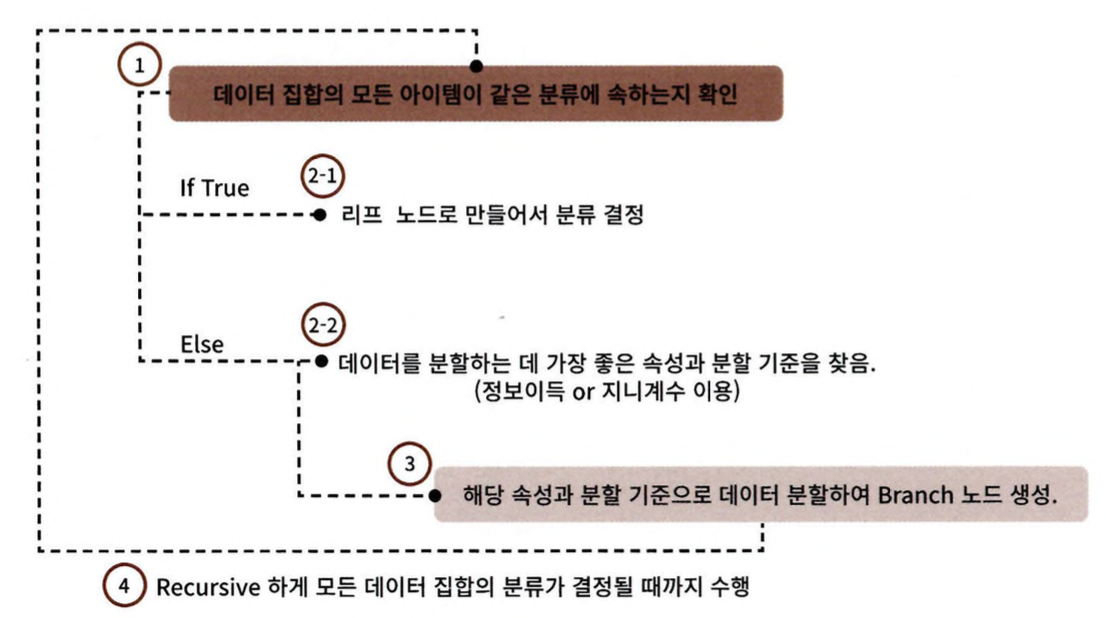

### 결정 트리 모델의 특징
'균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적임. 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고 전처리 작업이 필요없음. 반면에 결정 트리 모델의 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점임.

모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 오히려 더 많음에도 불구하고 학습 데이터 기반 모델의 정확도를 높이기 위해 계속 조건을 추가하면서 트리 깊이가 계속 커지고, 결과적으로 복잡한 학습 모델에 이르게 됨.

### 결정 트리 파라미터
- DecisionTreeClassifier: 분류를 위한 클래스
- DecisionTreeRegressor: 회귀를 위한 클래스
- CART(Classification And Regression Trees): 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘

#### 파라미터
- **min_samples_split**: 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합 제어하는 데 사용됨.
- **min_samples_leaf**: 분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수. 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우 작게 설정 필요
- **max_features**: 최적의 분할을 위해 고려할 최대 피처 개수. int형으로 지정하면 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트
- **max_depth**: 트리의 최대 깊이를 규정. 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
- **max_leaf_nodes**: 말단 노드의 최대 개수

### 결정 트리 모델의 시각화

**Graphviz 패키지**: 결정 트리 알고리즘이 어떤 규칙을 갖고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법

- `export_graphviz()` API 제공


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

인자로 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭을 입력해주면 됨.

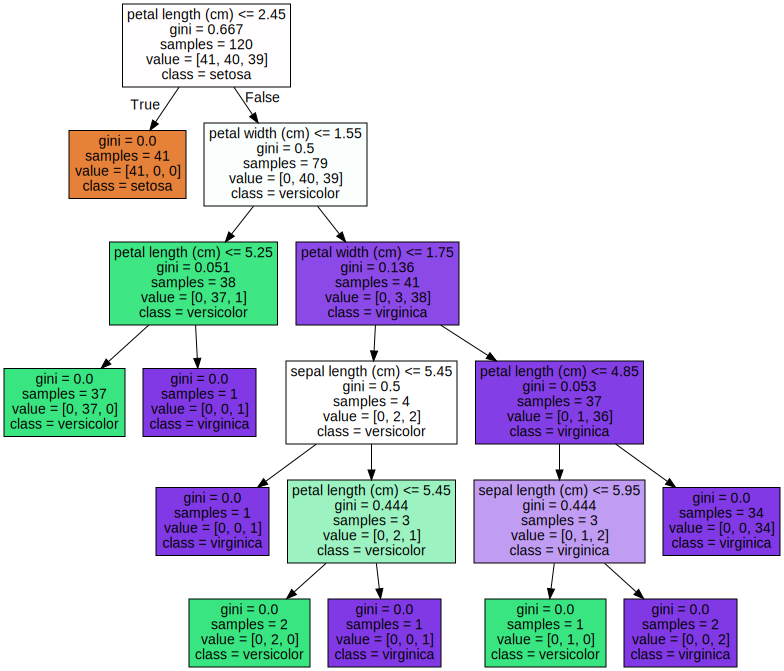

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

- petal length <= 2.45 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드임.
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples는 현 규칙에 해당하는 데이터 건수
- value=[]는 클래스 값 기반의 데이터 건수임. 0:Setosa, 1:Versicolor, 2:Virginica. Value=[41, 40, 39]라면 클래스 값의 순서로 Setosa=41, Versicolor=40, Virginica=39개로 구성돼 있다는 의미

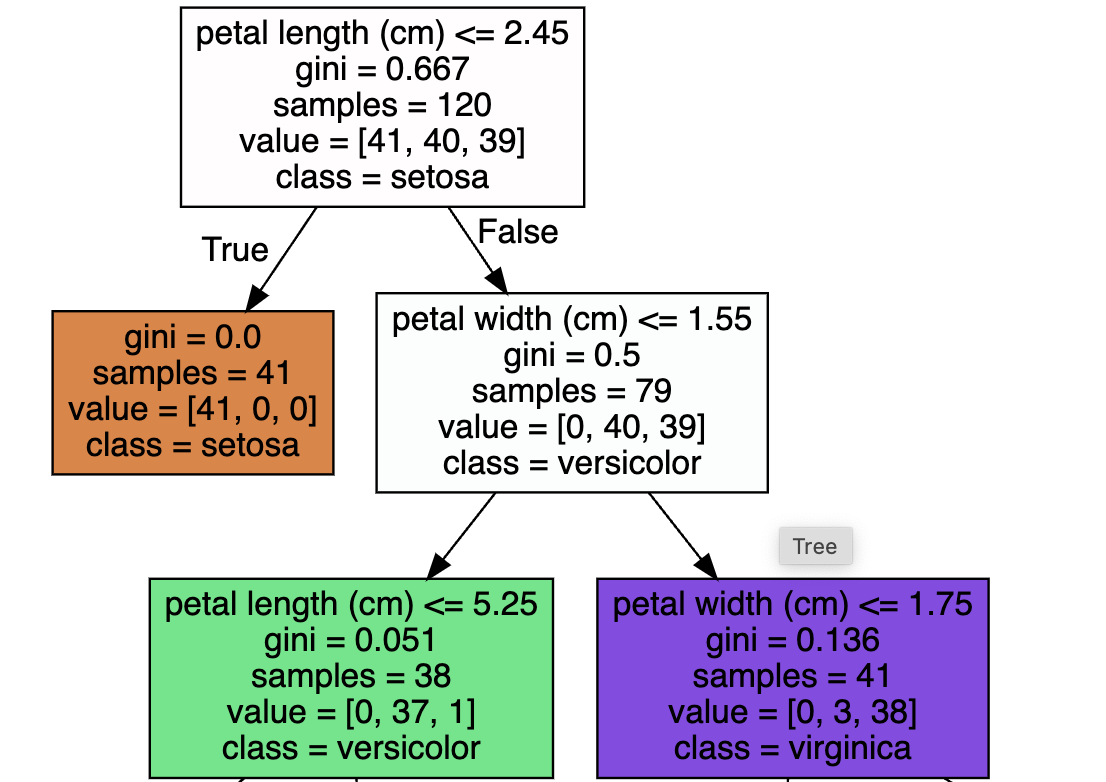

<1번 노드>
- samples = 120: 전체 데이터가 120개라는 의미
- value=[41,40,39]: Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성
- 지니 계수는 0.667
- petal length <= 2.45 규칙으로 자식 노드 생성
- class = setosa: 하위 노드를 가질 경우의 setosa의 개수가 41개로 제일 많다는 의미

<2번 노드>
- 모든 데이터가 Setosa로 결정되므로 리프 노드가 됨
- 지니 계수 0

<3번 노드>
- petal length <= 2.45가 False인 규칙 노드
- 79개의 샘플 데이터 중 Versicolor 40개, Virginica 39개로 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요

<4번 노드>
- 38개의 샘플 데이터 중 Versicolor 37개, Virginica 1개
- 지니 계수는 0.051로 매우 낮으나 여전히 혼재돼 있으므로 새로운 규칙으로 다시 자식 노드 생성

<5번 노드>
- 41개의 샘플 데이터 중 Versicolor 3개, Virginica 38개
- 지니 계수는 0.136으로 낮으나 혼재돼 있으므로 새로운 규칙으로 다시 자식 노드 생성


결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들기 때문에 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 됨.

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<Axes: >

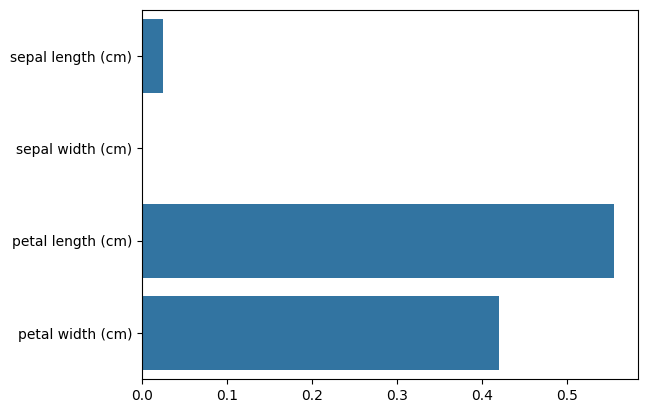

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}: {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

petal_length가 가장 피처 중요도가 높음을 알 수 있음

### 결정 트리 과적합(Overfitting)


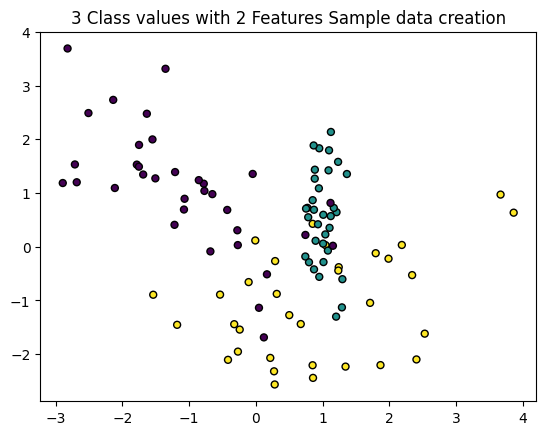

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

X, Y축으로 나열된 2차원 그래프이며 3개의 클래스 값 구분은 색깔로 돼 있음.

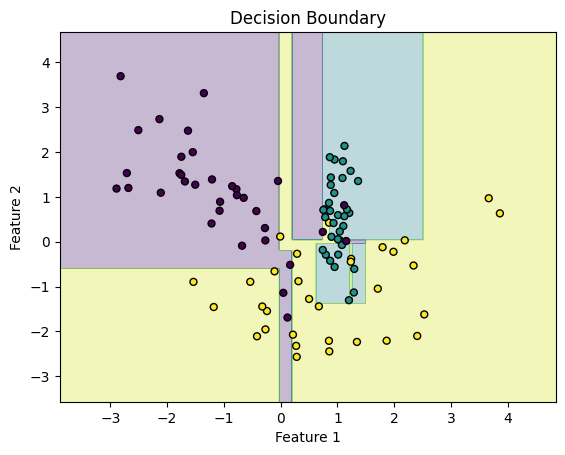

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def visualize_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Assuming X_features and y_labels are already defined
# from previous code
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌음. 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 됨.

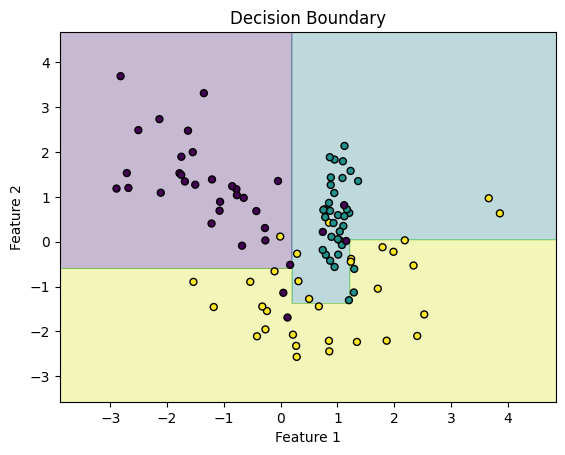

In [7]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됨. 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문임.

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음을 유추할 수 있음. 중복된 피처명들을 이용해 DataFrame에 로드하면 오류 발생함.

In [9]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


42개의 피처명이 중복돼 있음.

In [10]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
  if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [24]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당
  feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [25]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [26]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

 # 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'. format (accuracy))

 # DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6,8,10,12,16,20,24],
    'min_samples_split':[16]

}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [29]:
# GridSearchCV 객체의 cv_results_속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [30]:
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [31]:
params = {
    'max_depth': [8,12,16,20],
    'min_samples_split': [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [32]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


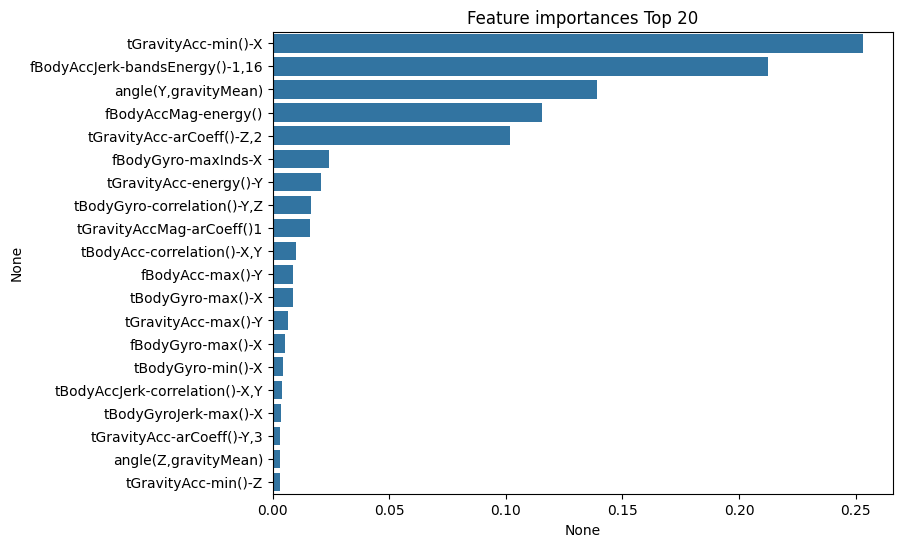

In [34]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()
